Você trabalha como cientista de dados em uma empresa de meteorologia que coleta dados diários de temperatura ao longo dos anos. O objetivo da empresa é prever a temperatura de amanhã com base nas temperaturas anteriores, para fornecer uma previsão mais precisa. Para isso, você decide usar uma rede neural do tipo LSTM (Long Short-Term Memory), que é adequada para lidar com dados sequenciais.

Seu objetivo nesta oficina é construir um modelo de deep learning utilizando uma rede neural LSTM que possa prever a temperatura do dia seguinte com base nas temperaturas dos últimos 30 dias.

## Passo 1: Preparação do Ambiente

1. Carregue as bibliotecas necessárias: Para começar, você vai usar bibliotecas como TensorFlow ou Keras, além do Pandas para manipulação de dados e Matplotlib para visualização.

Código:
```

# Importando as bibliotecas necessárias

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense

from sklearn.preprocessing import MinMaxScaler

```

## Passo 2: Carregamento e Preparação dos Dados

Para simplificar, você pode usar um conjunto de dados fictício ou dados históricos reais de temperaturas médias diárias. Vamos criar um conjunto de dados fictício de temperaturas para os últimos 100 dias.

Código:
```

# Gerando dados fictícios de temperaturas diárias para os últimos 100 dias

# A temperatura segue uma onda senoidal com um pouco de ruído para simular variação real

np.random.seed(0)

data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)



# Transformando os dados em um DataFrame para facilitar a manipulação

df = pd.DataFrame(data, columns=[“Temperatura”])



# Exibindo as primeiras 5 linhas do DataFrame para visualizar os dados

print(df.head())



# Visualizando os dados de temperatura para ter uma ideia das tendências

plt.plot(df)

plt.title(“Temperaturas Diárias”)

plt.xlabel(“Dias”)

plt.ylabel(“Temperatura (°C)”)

plt.show()

```
## Passo 3: Pré-processamento dos Dados

Agora, vamos preparar os dados para que possam ser usados em uma rede LSTM. Como LSTMs trabalham com sequências, vamos transformar nossos dados em janelas deslizantes, onde cada janela contém as temperaturas dos últimos 30 dias, e a rede deverá prever o 31o dia.

## Passo 4: Construção da Rede LSTM

Agora você vai criar uma rede LSTM simples com uma camada LSTM e uma camada densa para prever a temperatura.


## Passo 5: Avaliação e Previsão

Agora que o modelo está treinado, vamos avaliar o desempenho e fazer previsões nos dados de teste.

Envie o que você elaborou seguindo os passos desta oficina.

Boa prática!

In [6]:
# Passo 1: Preparação do Ambiente
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


Dados fictícios de temperatura são gerados para simular 100 dias de medições. Esses dados utilizam uma função matemática que imita variações naturais, como uma onda senoidal com ruído aleatório, reproduzindo oscilações entre dias mais quentes e mais frios. Um gráfico é plotado para visualizar a tendência das temperaturas, mostrando uma curva que sobe e desce de forma semelhante a padrões climáticos reais.

   Temperatura
0    26.764052
1    27.406646
2    29.910104
3    32.937234
4    34.097184


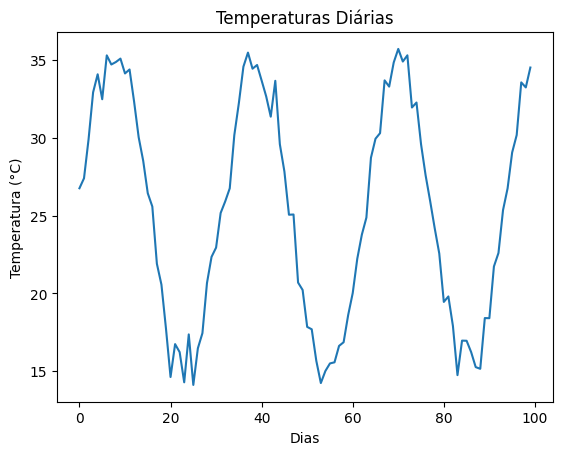

In [7]:
# Passo 2: Carregamento e Preparação dos Dados
# Gerando dados fictícios de temperaturas diárias para os últimos 100 dias

# A temperatura segue uma onda senoidal com um pouco de ruído para simular variação real
np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)

# Transformando os dados em um DataFrame para facilitar a manipulação
df = pd.DataFrame(data, columns=["Temperatura"])

# Exibindo as primeiras 5 linhas do DataFrame para visualizar os dados
print(df.head())

# Visualizando os dados de temperatura para ter uma ideia das tendências
plt.plot(df)
plt.title("Temperaturas Diárias")
plt.xlabel("Dias")
plt.ylabel("Temperatura (°C)")
plt.show()


Os dados são preparados para serem usados pela rede neural. Como a LSTM requer sequências temporais, as temperaturas são organizadas em janelas de 30 dias consecutivos. Por exemplo:

- Com dados dos dias 1 a 100, cada janela é estruturada da seguinte forma:

  - Janela 1: Dias 1–30 → Previsão do dia 31
  - Janela 2: Dias 2–31 → Previsão do dia 32
  - Janela 3: Dias 3–32 → Previsão do dia 33
  - ...

Em seguida, os valores são normalizados entre 0 e 1 usando o MinMaxScaler. Essa etapa é semelhante a ajustar o volume de uma música para evitar distorções, facilitando o aprendizado da rede. Os dados são divididos em treino (80% das janelas) para aprendizagem e teste (20%) para validar a capacidade do modelo de generalizar padrões.

In [8]:
# Passo 3: Pré-processamento dos Dados
# Definindo o tamanho da janela (30 dias)
window_size = 30

# Convertendo os dados para numpy array e normalizando
data = df['Temperatura'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Criando estruturas de sequências (X) e valores alvo (y)
X = []
y = []
for i in range(len(data_scaled) - window_size):
    X.append(data_scaled[i:i+window_size])
    y.append(data_scaled[i+window_size])

X = np.array(X)
y = np.array(y)

# Dividindo os dados em treino (80%) e teste (20%)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Verificando as formas dos dados
print("Formato dos dados de treino:", X_train.shape, y_train.shape)
print("Formato dos dados de teste:", X_test.shape, y_test.shape)


Formato dos dados de treino: (56, 30, 1) (56, 1)
Formato dos dados de teste: (14, 30, 1) (14, 1)


A rede LSTM é projetada para identificar padrões em sequências temporais. A arquitetura utilizada possui:

- Camada LSTM com 50 neurônios: Essas unidades processam as sequências e retêm informações de dias anteriores, usando a função de ativação relu para capturar relações complexas (ex.: "se a temperatura aumentou nos últimos dias, qual é a tendência para amanhã?").

- Camada densa: Converte as informações aprendidas pela LSTM em uma previsão numérica (a temperatura do próximo dia).

O modelo é treinado por 50 épocas, o que significa que analisa os dados de treino 50 vezes, ajustando seus parâmetros internos (pesos) para minimizar o erro. O otimizador adam é usado para encontrar os melhores ajustes, e a função de perda mse (erro quadrático médio) mede a diferença entre previsões e valores reais.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - loss: 0.4674 - val_loss: 0.3548
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.4595 - val_loss: 0.3285
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.3946 - val_loss: 0.3041
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.3845 - val_loss: 0.2818
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.3325 - val_loss: 0.2605
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2830 - val_loss: 0.2400
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.2681 - val_loss: 0.2201
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.2496 - val_loss: 0.2003
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.2258 - val_loss: 0.1805
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.1983 - val_loss: 0.1605
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1687 - val_loss: 0.1403
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1415 - val_loss: 0.1204
Epoch 13

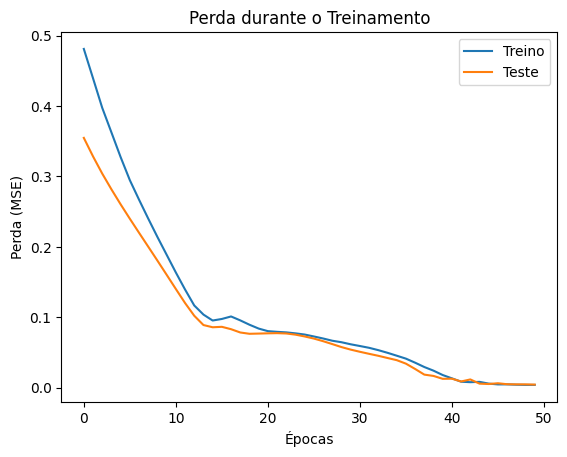

In [4]:
# Passo 4: Construção da Rede LSTM
# Criando a arquitetura da LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinando o modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Visualizando a perda durante o treinamento
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Teste')
plt.title('Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.show()


Após o treinamento, o desempenho do modelo é avaliado:

- Previsões no conjunto de teste: São geradas previsões para os 20% dos dados que o modelo nunca viu durante o treino.

- Conversão para escala original: As previsões normalizadas são transformadas novamente em graus Celsius usando o inverse_transform do scaler.

- Cálculo do RMSE: Essa métrica indica o erro médio das previsões. Por exemplo, um RMSE de 1.5 °C significa que, em média, o modelo erra 1.5 °C em relação à temperatura real.

- Visualização comparativa: Um gráfico sobrepõe as previsões (linha laranja) aos valores reais (linha azul). Se as linhas estão próximas, o modelo é eficaz; se divergem, ajustes na arquitetura ou treinamento são necessários.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
RMSE: 1.45 °C


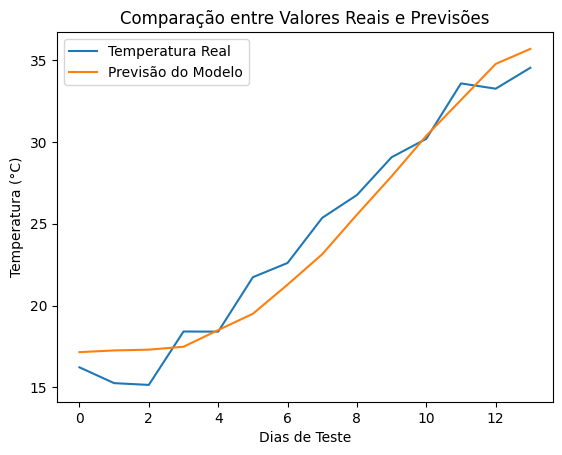

In [5]:
# Passo 5: Avaliação e Previsão
# Fazendo previsões nos dados de teste
predictions = model.predict(X_test)

# Revertendo a normalização para a escala original
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

# Calculando o RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((predictions - y_test_original)**2))
print(f"RMSE: {rmse:.2f} °C")

# Visualizando as previsões vs valores reais
plt.plot(y_test_original, label='Temperatura Real')
plt.plot(predictions, label='Previsão do Modelo')
plt.title('Comparação entre Valores Reais e Previsões')
plt.xlabel('Dias de Teste')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()
